Firstly, we need to import pandas and load the necessary dataset.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/main_data.tab',sep = '\t')

We need to separate the data into two dataframes; the one with the host cities and the other with the nonhost cities.

In [3]:
host = data.loc[data['hostcity'] == 1]

nohost = data.loc[data['hostcity'] == 0]

In [4]:
data.loc[data['repression'] == 6]['date']

1431    1978-04-02
Name: date, dtype: object

Then, we import our libraries to run the models.

In [5]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import logit
import matplotlib.pyplot as plt
import numpy as np
# from plotnine import *
import seaborn as sns
import scipy.stats.stats as stats

Next, we need to run the model.

We will choose to include both control variables and the fixed effects. The dependent variable is `repression`. 

In [6]:
independent_variables = ' + '.join(['hostcitytime', 'hostcitytime2', 'hostcity', 'time', 'time2', 'lnpop_1970', 'vote_frejuli', 'literacy_avg', 'lnrebact1974', 'lnrepression70_77', 'zone2', 'zone3', 'zone4', 'zone5'])


model3 = smf.ols("repression ~ " + independent_variables, data = data)
m3 = model3.fit(cov_type='hc1')
m3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             repression   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     10.53
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           2.57e-24
Time:                        12:09:37   Log-Likelihood:                 48455.
No. Observations:               56394   AIC:                        -9.688e+04
Df Residuals:                   56379   BIC:                        -9.675e+04
Df Model:                          14                                         
Covariance Type:                  hc1                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.0063      0.004     -1.432      0.152      -0.015       0.002
hostcitytime          0.9026      0.295      3.064      0.002       0.325       1.480
hostcitytime2        -0.7119      0.224     -3.184      0.001      -1.150      -0.274
hostcity             -0.0482      0.063     -0.764      0.445      -0.172       0.075
time                 -0.0064      0.004     -1.460      0.144      -0.015       0.002
time2                 0.0047      0.003      1.385      0.166      -0.002       0.011
lnpop_1970            0.0057      0.001      6.498      0.000       0.004       0.007
vote_frejuli       3.084e-05   4.58e-05      0.674      0.500   -5.88e-05       0.000
literacy_avg         -0.0409      0.005     -8.101      0.000      -0.051      -0.031
lnrebact1974         -0.0025      0.000     -5.576      0.000      -0.003      -0.002
lnrepression70_77     0.0054      0.001      7.366      0.000       0.004       0.007
zone2                -0.0264      0.003     -8.024      0.000      -0.033      -0.020
zone3                -0.0213      0.003     -7.822      0.000      -0.027      -0.016
zone4                -0.0174      0.006     -2.727      0.006      -0.030      -0.005
zone5                -0.0168      0.002     -7.882      0.000      -0.021      -0.013
==============================================================================
Omnibus:                   144749.652   Durbin-Watson:                   1.705
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3455809060.067
Skew:                          29.280   Prob(JB):                         0.00
Kurtosis:                    1214.315   Cond. No.                     9.29e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 9.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now, we predict. 

We will predict the daily repression events both for the host and the nonhost cities.

In [7]:
rep_predicted = m3.predict(nohost)
rep_predicted = rep_predicted.to_frame()


rep_predicted1 = m3.predict(host)
rep_predicted1 = rep_predicted1.to_frame()

We name the new column as `pred`.

In [8]:
rep_predicted = rep_predicted.rename(columns={0:'pred'})
rep_predicted

rep_predicted1 = rep_predicted1.rename(columns={0:'pred'})
rep_predicted1

,pred
11524,NaN
11525,NaN
11526,NaN
11527,NaN
11528,NaN
...,...
119523,NaN
119524,NaN
119525,NaN
119526,NaN


And we merge the predictions with the the two dataframes we created earlier.

In [9]:
t = pd.merge(nohost,rep_predicted,left_index=True,right_index=True)
t1 = pd.merge(host,rep_predicted1,left_index=True,right_index=True)

In [10]:
t = t.dropna(subset=['pred'])
t1 = t1.dropna(subset=['pred'])

Now, let's plot. 

First, we plot the predicted daily repression events for host cities.

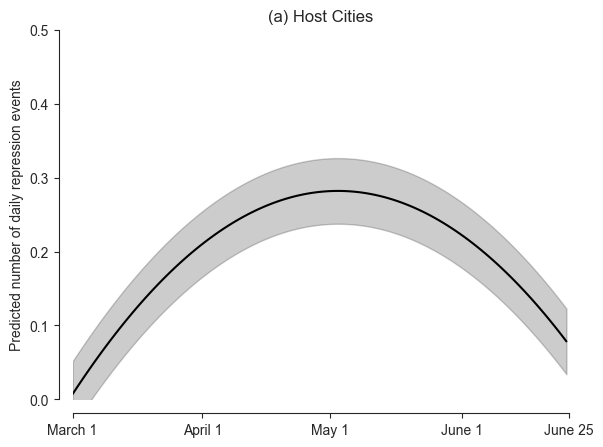

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("ticks")

# _=sns.lmplot(x="time", y='pred', data=t,ci=95,scatter_kws={"s": 5});
_ = sns.lineplot(x='time', y= 'pred', data=t1,color='black',errorbar=('se',5))
# _ = sns.lineplot(x='time', y= 'repression', data=t1,color='gray')



sns.despine(trim = False, offset=10)
plt.xticks(rotation=45)

_.set_xticks([0.01,0.315,0.615,0.925,1.175])
_.set_xticklabels(["March 1","April 1","May 1","June 1","June 25"])
plt.xticks(rotation=0)

_.set(ylim=(0,0.5),xlim=(0.01,1.175),xlabel=None,
      ylabel = "Predicted number of daily repression events",
      title="(a) Host Cities")
plt.show()

Next, we plot the predicted daily repression events for nonhost cities.

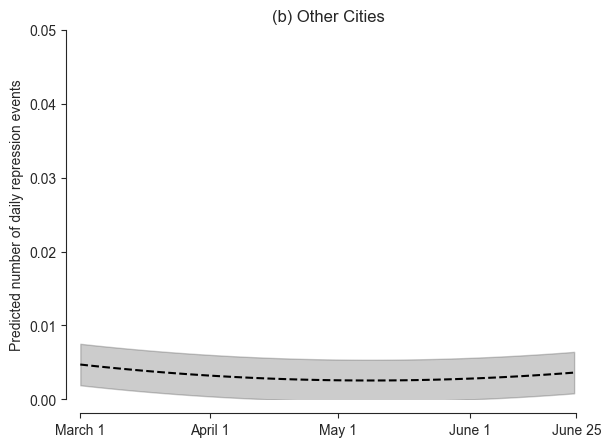

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("ticks")

_ = sns.lineplot(x='time', y= 'pred', data=t,linestyle='--',color='black',errorbar=('se',5))



sns.despine(trim = False, offset=10)
plt.xticks(rotation=45)

_.set_xticks([0.01,0.315,0.615,0.925,1.175])
_.set_xticklabels(["March 1","April 1","May 1","June 1","June 25"])
plt.xticks(rotation=0)

_.set(ylim=(0,0.05),
      xlim=(0.01,1.175),
        xlabel=None,
      ylabel = "Predicted number of daily repression events",
      title="(b) Other Cities")
plt.show()

Now, let's enrich the two figures with some additional information.

We will add the actual daily repression events. We will use lineplot for this and not scatterplot, since we want a continuous line/relationship in the daily repression events.

First, for the host cities. 

* Notice that we need to change the limit of the y-axis to depict this.

* The gray line is the line connecting the actual numbers of repression events per day.




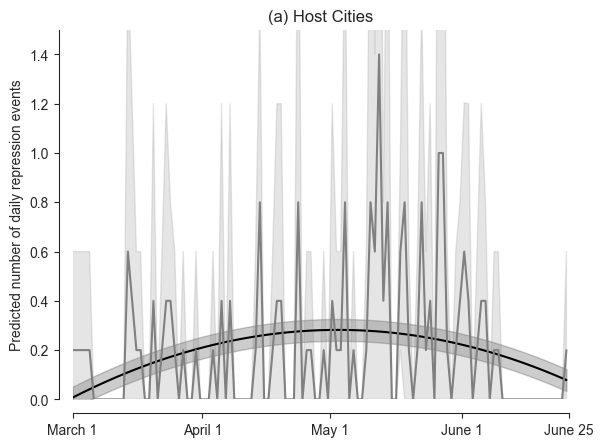

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("ticks")

# _=sns.lmplot(x="time", y='pred', data=t,ci=95,scatter_kws={"s": 5});
_ = sns.lineplot(x='time', y= 'pred', data=t1,color='black',errorbar=('se',5))
_ = sns.lineplot(x='time', y= 'repression', data=t1,color='gray')



sns.despine(trim = False, offset=10)
plt.xticks(rotation=45)

_.set_xticks([0.01,0.315,0.615,0.925,1.175])
_.set_xticklabels(["March 1","April 1","May 1","June 1","June 25"])
plt.xticks(rotation=0)

_.set(ylim=(0,1.5),xlim=(0.01,1.175),xlabel=None,
      ylabel = "Predicted number of daily repression events",
      title="(a) Host Cities")
plt.show()

Next, for the nonhost cities. 

* The gray line is the line connecting the actual numbers of repression events per day.


In [14]:
First, for the host cities. 

* Notice that we need to change the limit of the y-axis to depict this.

* The gray line is the line connecting the actual numbers of repression events per day.




SyntaxError: invalid syntax (232348990.py, line 1)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("ticks")

_ = sns.lineplot(x='time', y= 'pred', data=t,linestyle='--',color='black',errorbar=('se',5))
_ = sns.lineplot(x='time', y= 'repression', data=t,color='gray')



sns.despine(trim = False, offset=10)
plt.xticks(rotation=45)

_.set_xticks([0.01,0.315,0.615,0.925,1.175])
_.set_xticklabels(["March 1","April 1","May 1","June 1","June 25"])
plt.xticks(rotation=0)

_.set(ylim=(0,0.05),
      xlim=(0.01,1.175),
        xlabel=None,
      ylabel = "Predicted number of daily repression events",
      title="(b) Other Cities")
plt.show()

##  Interpretation

Now, it is time to interpret the figures we created (replicated).

The authors formulate two hypotheses:

* *H1: In the run-up to an international sports tournament, state repression spikes in host cities, but not in other cities.*

* *H2: During an international sports tournament, state repression drops in host cities but remains unchanged in other cities.*

Again, both of the hypotheses seem to hold true based on the figures.

The tournament took place between June 1st and 25th.

#### The first hypothesis is confirmed visually by the both prediction plots.

* Indeed, state repression in host cities seems to approach a maximum in mid May, while it drops again right at the start of the tournament.


* On the other hand, figure (b) shows that there is a constant, to a lower extent, repression in non host cities. This repression is not affected by the tournament period, dince it continues to be relatively "stable".

#### The second hypothesis is confirmed visually by the both prediction plots.

* Adding to the previous explanations about the first hypothesis, we can conclude from figure (a) that, between June 1st and 25th, state repression decreases in host cities.


* On the contrary,  figure (b) indicates that, during the tournament period, state violence remained unchanged in nonhost cities.


#### The figures confirm the obvious phenomenon followed by military dictatorships and authoritarian regimes in general:

These regimes want to create the impression that they function in a peaceful way and do not repress the people that are against it. That is why Argentine junta opted to abstain from shootings, abductions and all these inhumane actions against domestic "rebels" during the World Cup. Argentina was in the limelight because it was the host country of a world event, which is meant to unite countries, that is appealing to the masses.

For the same reason, Argentine junta opted to increase the aforementioned actions in the run-up to the World Cup. It would not be persuasive if the reporters coming from all over the world captured footage of domestic resistance. So, they wisely decided to focus on getting rid of these "rebels" before the tournament, even reaching 5 and 6 repression events per day(!) (based on the data)  in April and May.

